In [14]:
#MNISTダウンロード
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home=".") 

In [22]:
#データの前処理

x = mnist.data /255
y = mnist.target

import numpy as np #ラベルを数値データに変更
y = np.array(y)
y = y.astype(np.int32)

この画像データのラベルは5です


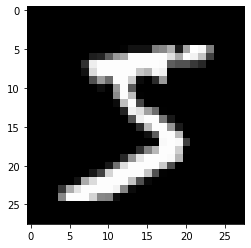

In [31]:
#MNISTの1つ目を可視化する
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x[0].reshape(28, 28), cmap='gray')

print("この画像データのラベルは{:.0f}です".format(y[0]))

In [24]:
# DataLoaderの作成

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

#データを訓練とテストに分割
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/7,random_state=0)

#データをpytorchのtensorに変換
x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#データセットを作成
ds_train = TensorDataset(x_train, y_train)
ds_test = TensorDataset(x_test, y_test)

#データセットのミニバッチサイズを指定したDataLoaderを作成
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)


In [25]:
#ネットワークの構成

from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [26]:
#誤差関数と最適化の設定

from torch import optim

#誤差関数の設定
loss_fn = nn.CrossEntropyLoss()

#最適化手法
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
#学習

def train(epoch):
    model.train() #ネットワークを学習モードに切り替える
    
    # データローダーから1ミニバッチずつ取り出して計算する
    for data, targets in loader_train:
        
        optimizer.zero_grad()
        outputs =model(data)
        loss = loss_fn(outputs, targets)
        
        loss.backward() #誤差のバックプロパゲーションを元エメル
        optimizer.step()
        
    print("epoch{}:終了\n".format(epoch))

In [35]:
#推論
def test():
    model.eval()
    correct =0
    
    with torch.no_grad():
        for data, targets in loader_test:
        
            outputs = model(data) #入力dataをinputし出力を求める
            
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()#正解と一緒だったらカウントアップ
    
    #正解率を出力
    data_num = len(loader_test.dataset)
    print('\nテストデータの正解率:{}/{}({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))   

In [36]:
#学習なしにテストデータで推論
test()


テストデータの正解率:751/10000(8%)



In [37]:
#学習と推論
for epoch in range(3):
    train(epoch)

test()

epoch0:終了

epoch1:終了

epoch2:終了


テストデータの正解率:9649/10000(96%)



予想結果は2
この画像データの正解ラベルは2です


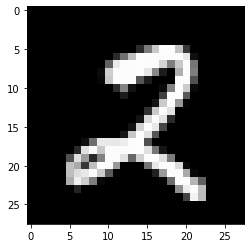

In [39]:
#特定の画像データを推論

index = 2018

model.eval()

data = x_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("予想結果は{}".format(predicted))

x_test_show = (x_test[index]).numpy()
plt.imshow(x_test_show.reshape(28,28), cmap='gray')
print("この画像データの正解ラベルは{:.0f}です".format(y_test[index]))
